In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm
from sklearn. preprocessing import StandardScaler
from scipy import stats
import datetime

In [3]:
# This function to open the entered file whatever it was csv or xlsx

def Read_file(Path):  
    try:
        Data = pd.read_csv(Path)
    except:
        Data = pd.read_excel(Path)
        
    return Data

In [4]:
# This function to handle the case of existance of percentage in sting form(convert it back to integers)

def Is_Percentage(Column): # column such as Data['Percentage']
    for i in range(Column.shape[0]):
        try:
            Column[i] = Column[i].replace('%','').strip() #removing
            Column[i] = Column[i].replace(',','').strip()
        except:
            pass
    try:
        Column.astype('float')
    except:
        return False
    
    return True

In [5]:
#  This function to handle the case of existance of price in sting form(convert it back to integers)

def Is_Currency(Column): # column such as Data['Price']
    for i in range(Column.shape[0]):
        try:
            Column[i] = Column[i].replace('$','').strip() #removing
            Column[i] = Column[i].replace(',','').strip()
            print(Column[i])
        except:
            pass
    try:
        Column.astype('float')
    except:
        return False
    
    return True

In [6]:
# This function is to extracting the key columns that will not be useful in visualizations

def Check_Key(Column):
    return Column.is_unique

In [23]:
# Drawing content over dictionary

def DrawThing(dic, Name):
    X_List = []
    Y_List = []
    for value in sorted(dic.items(), key=lambda x: x[0], reverse=False):
        X_List.append(value[0])
        Y_List.append(value[1])
    plt.plot(X_List, Y_List)
    plt.ylabel('Number of records over Years')
    plt.xlabel('{}'.format(Name))
    plt.title('{}s Activity Graph'.format(Name))
    plt.show()

In [107]:
# This function is responsible for drawing the activity over days, months, and years.

def DrawActivity(Data_List):
    Day_list = []
    Month_list = []
    Year_list = []
    
    for i in range (len(Data_List)):
        try:
            datem = datetime.datetime.strptime(str(Data_List[i]), "%d/%m/%Y")
        except:
            datem = datetime.datetime.strptime(str(Data_List[i]), "%Y-%m-%d %H:%M:%S")
    
        day = datem.day
        month = datem.month
        year = datem.year
        
        Day_list.append(day)
        Month_list.append(month)
        Year_list.append(year)
        
    dic_Day = {x:Day_list.count(x) for x in Day_list}
    dic_Month = {x:Month_list.count(x) for x in Month_list}
    dic_Year = {x:Year_list.count(x) for x in Year_list}
     
    print("This is the total day activity curve over years")
    DrawThing(dic_Day, 'Day')
    print("This is the total month activity curve over years")
    DrawThing(dic_Month, 'Month')
    print("This is the total year activity curve over years")
    DrawThing(dic_Year, 'Year')

In [108]:
def Defining_Keys(quantitative_data, Quantitative, qualitative_data, Qualitative):
    
    Trigger = 0
    number = 0      # to adjust index after removing from list

    for column1 in range(quantitative_data[Quantitative].shape[1]):
        Checking = Check_Key(quantitative_data[Quantitative[column1 - number]])
        if (Checking):
            Trigger +=1
            Key = quantitative_data[Quantitative[column1 - number]]   # to edit
            # Extracting Keys
            Quantitative.remove(Key.name)
            quantitative_data.drop(Key.name, inplace=True, axis=1)
            number +=1
            print("{} is a key".format(Key.name))
            
            # uncomment the following lines for using the list of keys
            '''
            if (Trigger == 1):
                Key_List = pd.concat([Key], axis=1, join='inner')
            else:
                Key_List = pd.concat([Key_List, Key], axis=1, join='inner')
            '''
                
    Trigger = 0          
    number = 0       # to adjust index after removing from list
    # Selecting Key from Qualitative data 
    for column2 in range(qualitative_data[Qualitative].shape[1]):
        Checking2 = Check_Key(qualitative_data[Qualitative[column2 - number]])
        if (Checking2):
            # Extracting Keys
            Key = qualitative_data[Qualitative[column2 - number]]   # to edit
            Qualitative.remove(Key.name)
            qualitative_data.drop(Key.name, inplace=True, axis=1)
            # Extracting Dates
            number +=1
            print("{} is a key".format(Key.name))
            
            # uncomment the following lines for using the list of keys
            '''
            try: 
                Key_List
                Key_List = pd.concat([Key_List, Key], axis=1, join='inner')
            except:
                Key_List = pd.concat([Key], axis=1, join='inner')
            ''' 

In [136]:
def AutoVisualize(Path): # The main function
    
    Data = Read_file(Path)
    Data = Data.drop_duplicates()  # Dropping Duplicated data
    
    total = Data.isnull().sum().sort_values(ascending = False)
    percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    # Dropping columns that has more than 30% nulls
    for name in missing_data.Percent.index:
        if (missing_data.Percent[name] > 0.3):
            Data.drop(name, axis=1, inplace=True)
         
    # Defining the percentage of data that we will continue with after dropping all nulls
    Percent_Loss = (Data.isna().any(axis=1).sum()) / Data.shape[0]
    print("If we will drop the whole null values, we will continue with only {}%".format((1-Percent_Loss)*100))
    
    
    #Dropping all nulls -------------------------------------------( to be revised)
    Data = Data.dropna().reset_index(drop=True) # reset_index to shuffle index after deleting 
    
    
    # categorizing the data is important to choose the best suitable visualization polting
    Quantitative = [f for f in Data.columns if Data.dtypes[f] in ['int64', 'float64']] # Name of quantitative columns
    Qualitative = [f for f in Data.columns if Data.dtypes[f] == ('object')] # Name of qualitative columns
    Boolean =  [f for f in Data.columns if Data.dtypes[f] == ('bool')] # Name of boolean columns
    # Please note that we can deal with boolean as same as object, but I prefered to separate them
    
    
    
    quantitative_data = Data[Quantitative]   # The quantitative data itself
    qualitative_data = Data[Qualitative]     # The qualitative data itself
    bool_data = Data[Boolean]                # The boolean data itself
    

    # Selecting Key from Quantitative & Qualitative data---------------------------------------------

    Key_List = Defining_Keys(quantitative_data, Quantitative, qualitative_data, Qualitative)
    
    
    # Representing Quantitative Data
    quantitative_data.hist(bins=50, figsize=(20,15))
    plt.show()
    
    # --------------------------------------------------------------------------------
    # Plotting Bar graphs for qualitative data
    
    for column in range(qualitative_data[Qualitative].shape[1]):
        Number_Categories = qualitative_data[Qualitative[column]].value_counts().shape[0]
        if ( Number_Categories < 10):
            f1 = plt.figure(column)
            qualitative_data[Qualitative[column]].value_counts().plot(kind='bar')
            f1.show()
    
    # Plotting Boolean data
    for column in range(bool_data[Boolean].shape[1]):
        f2 = plt.figure(column)
        bool_data[Boolean[column]].value_counts().plot(kind='pie',autopct='%1.0f%%')
        f2.show()
            
    # Plotting Pie graphs for qualitive data that has categories between 10 and 20
    for column in range(qualitative_data[Qualitative].shape[1]):
        Number_Categories = qualitative_data[Qualitative[column]].value_counts().shape[0]
        if ( (Number_Categories >= 10) and (Number_Categories <= 20) ):
            f3 = plt.figure(column)
            qualitative_data[Qualitative[column]].value_counts().plot(kind='pie',autopct='%1.0f%%')
            f3.show()
            
    #---------------------------------------------------------------------------------
    # The next code is for representing data the activity over years
    '''
    adaptor = 0
    for column in range(qualitative_data[Qualitative].shape[1]):
        try :
            Date_List = pd.to_datetime(qualitative_data[Qualitative[column - adaptor]])
            #print(Date_List)
            Name = qualitative_data[Qualitative[column - adaptor]].name
            qualitative_data.drop(Name, inplace=True, axis=1)
            Qualitative.remove(Name)
            adaptor +=1
        except ValueError:
            pass
    try:
        Date_List
        datetime.datetime.strptime(str(Data_List[0]), "%Y-%m-%d %H:%M:%S")
        plt.show()
        DrawActivity(Date_List)
    except:
        pass
    '''

If we will drop the whole null values, we will continue with only 92.85714285714286%


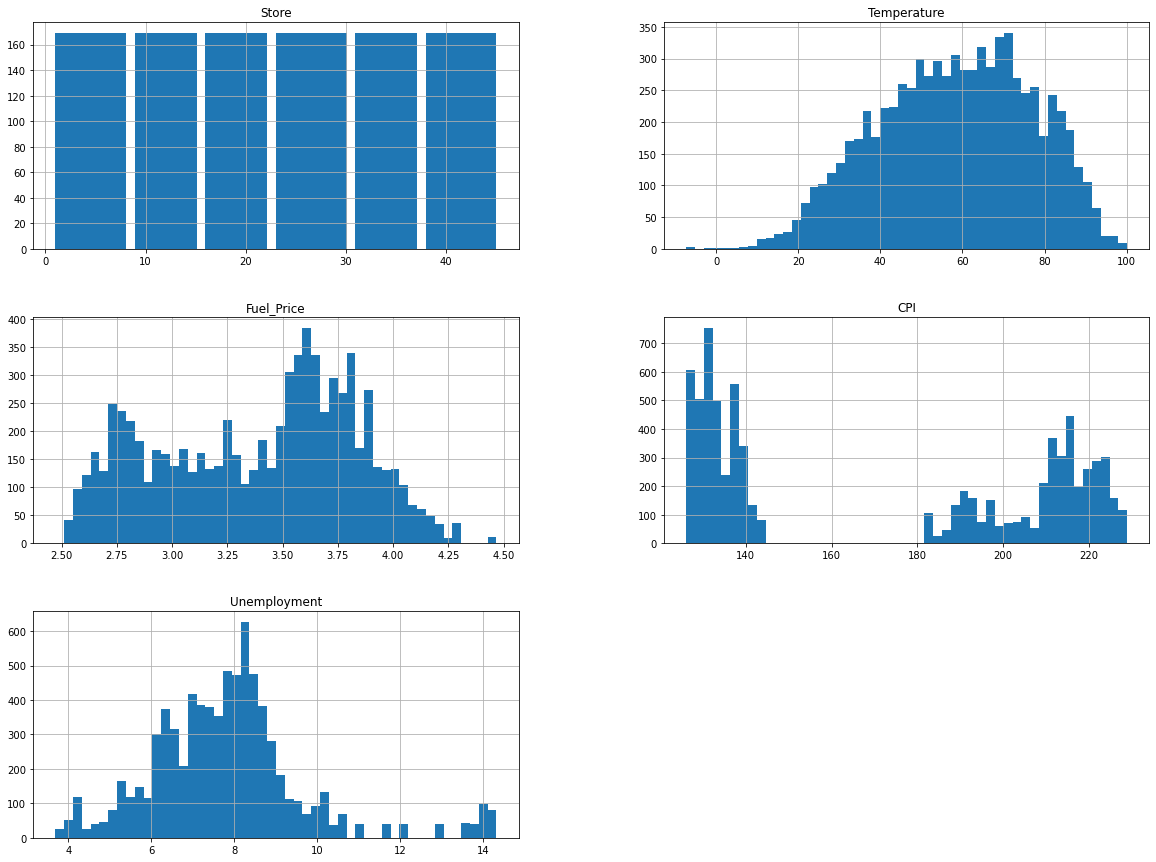

C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_13524\3576218868.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f2.show()


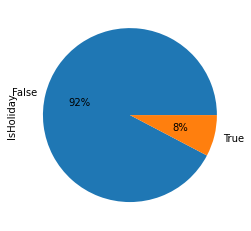

In [139]:
#AutoVisualize('Police Shooting Dataset/fatal-police-shootings.xlsx')
#AutoVisualize('Retail Data Analysis/Features data set.csv')
#AutoVisualize('Retail Data Analysis/sales data-set.csv')
#AutoVisualize('Retail Data Analysis/stores data-set.csv')